# Siamese Network , L2 Contrastive Loss Function © Satyake

#### Source https://github.com/Satyake/One-Shot-Learning
###### All rights reserved CC-BY share alike
###### Adaptation of the Code based on:  
 Bakshi, S., Rajan, S.: Few-shot fall detection using shallow siamese network. 2021 IEEE International
 Symposium on Medical Measurements and Applications
 (MeMeA) pp. 1–5 (2021)   


###### General Imports 

In [ ]:
import keras
from keras.layers import Dense,Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten,Concatenate,Input,Lambda
from keras.models import Sequential
import tensorflow as tf
import numpy as np 
import random
import matplotlib.pyplot as plt
from keras.models import Model
from keras import backend as K
import numpy as np
import glob
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
import os
import pickle
import matplotlib.pyplot as plt
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

###### Standard MNIST

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


##### Function to generate pairs.  
1 if similar 0 if dissimilar.

In [4]:
def pairs_generation(x,y):   #Function to generate positive and negative pairs
  num_classes=max(y)+1       # Num_classes contain the number of classes
  pairs=[]                   # Initialize an empty array to store the pairs 
  labels=[]                  # Initialize an empty array to store the labels
  digit_indices=[np.where(y==i)[0] for i in range(num_classes)]    # used to create a list of indices of the images
  for idx in range(len(x)):                    # iterate though the entire dataset
    x1=x[idx]                                  # pick a sample
    label=y[idx]                               # pick a label of that sample
    idx2=random.choice(digit_indices[label])   # randomly pick the indice of the same sample picked
    x2=x[idx2]                                 # assign it to x2
    pairs+=[[x1,x2]]                           # contains identical pairs
    labels+=[1]                                # Labeled as 1 (Similar) 

    label2=random.randint(0,num_classes-1)    # Instantiate label2 to be a number between 0 and num_classes-1 
    while label2==label:                     # if Label2 is identical to Label1 we will pick from num_classes-1
      label2=random.randint(0,num_classes-1)   
    idx2=random.choice(digit_indices[label2])  # randomly choose an idx such that it belongs to label2 which is differnet than label1
    x2=x[idx2]                                 # Dissimilar pairs Genarated
    pairs+=[[x1,x2]]
    labels+=[0]
  return np.array(pairs),np.array(labels)

In [5]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)     #Some reshapping for compatibility


In [6]:
train_pairs,train_labels=pairs_generation(x_train,y_train)
test_pairs,test_labels=pairs_generation(x_test,y_test)

In [7]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [44]:
input=Input((28,28,1))                                               ###
x=keras.layers.Conv2D(32,3,strides=1,activation='relu')(input)      ####
x=keras.layers.MaxPool2D(pool_size=(2,2))(x)                         #####
x=keras.layers.Flatten()(x)                                            #####
dense=keras.layers.Dense(128)(x)                                        ##########
model=keras.models.Model(input,dense)                         ################ Base Network TO be Shared ############

inpu1=Input((28,28,1))                                         #Sharing of Base Network
inpu2=Input((28,28,1))
md1=model(inpu1)
md2=model(inpu2)

merged=keras.layers.Lambda(euclidean_distance)([md1,md2])                   #Concatenating the two networks using the Lambda layer to combine with eucledian_distance
DL=keras.layers.Dense(1,activation='sigmoid')(merged)        #Adding a final layer       

FM=Model(inputs=[inpu1,inpu2],outputs=DL)

In [45]:
FM.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

FM.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
functional_5 (Functional)       (None, 128)          692672      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           functional_5[0][0]    

In [46]:
history=FM.fit([train_pairs[:,0],train_pairs[:,1]],train_labels[:],validation_split=0.25,epochs=10)

Epoch 1/10
2813/2813 [==============================] - 27s 10ms/step - loss: 2.9591 - accuracy: 0.5489 - val_loss: 0.6301 - val_accuracy: 0.6297
Epoch 2/10
2813/2813 [==============================] - 26s 9ms/step - loss: 0.5572 - accuracy: 0.7285 - val_loss: 0.4920 - val_accuracy: 0.7808
Epoch 3/10
2813/2813 [==============================] - 26s 9ms/step - loss: 0.4628 - accuracy: 0.7906 - val_loss: 0.4203 - val_accuracy: 0.8202
Epoch 4/10
2813/2813 [==============================] - 27s 9ms/step - loss: 0.4229 - accuracy: 0.8112 - val_loss: 0.3972 - val_accuracy: 0.8272
Epoch 5/10
2813/2813 [==============================] - 27s 10ms/step - loss: 0.3984 - accuracy: 0.8235 - val_loss: 0.3943 - val_accuracy: 0.8272
Epoch 6/10
2813/2813 [==============================] - 27s 10ms/step - loss: 0.3204 - accuracy: 0.8691 - val_loss: 0.2736 - val_accuracy: 0.8934
Epoch 7/10
2813/2813 [==============================] - 27s 10ms/step - loss: 0.2673 - accuracy: 0.8961 - val_loss: 0.2548 - va

In [52]:
from sklearn import metrics


In [53]:
preds=FM.predict([test_pairs[:,0],test_pairs[:,1]])

In [54]:
test_labels

array([1, 0, 1, ..., 0, 1, 0])

In [55]:
preds

array([[5.8819377e-01],
       [4.8540086e-02],
       [7.7494073e-01],
       ...,
       [3.7138492e-02],
       [9.0106523e-01],
       [5.8971811e-05]], dtype=float32)

In [51]:
test_labels

array([1, 0, 1, ..., 0, 1, 0])

In [14]:
tensorboard --logdir=/tmp/tensorboard_roc


SyntaxError: invalid syntax (<ipython-input-14-d4cab6998351>, line 1)

In [56]:
from sklearn.metrics import roc_curve, auc





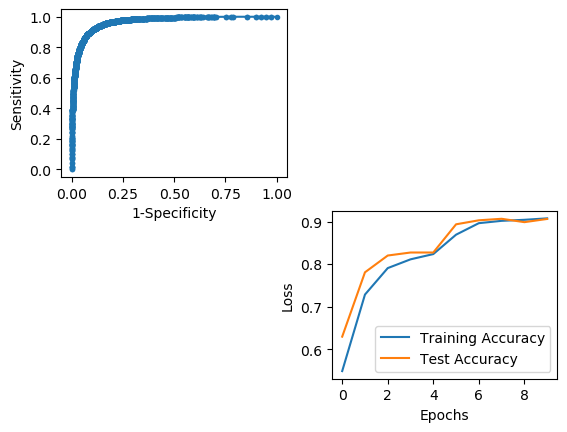

In [67]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(test_labels, preds)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.subplots(constrained_layout=False)
plt.subplot(2,2,1)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.subplot(2,2,4)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
print('AUC {}'.format(auc_keras))

AUC 0.994565145
